## Final Project
**Authors:** Nick Romano and Trevor McCormick   
**Version 1.14**   
**DS160-01: Introduction to Data Science**   


---

The datasets used in this notebook come from the Dodgers Loop Sensor Data Set from the UCI Machine Learning Repository.

**Citation:**    
Hutchins, J (2006). Dodgers Loop Sensor Data Set [Data set]. UCI Machine Learning Repository. Retrieved April 19, 2022, from https://archive.ics.uci.edu/ml/datasets/dodgers+loop+sensor

Our goal is to be able to predict the occurence of Dodgers baseball games given the traffic measured by sensor data collected on the Glendale on ramp to 101 North Freeway, which is nearby Dodger Stadium to see increasing traffic after a Dodgers game.

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import resample
#from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Reading in Data

In [2]:
df_traffic = pd.read_csv("Dodgers.data", header = None)
df_games = pd.read_csv("Dodgers.events", header = None)

In [3]:
df_traffic

,0,1
0,4/10/2005 0:00,-1
1,4/10/2005 0:05,-1
2,4/10/2005 0:10,-1
3,4/10/2005 0:15,-1
4,4/10/2005 0:20,-1
...,...,...
50395,10/1/2005 23:35,-1
50396,10/1/2005 23:40,-1
50397,10/1/2005 23:45,-1
50398,10/1/2005 23:50,-1


In [4]:
df_games

,0,1,2,3,4,5
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8�
1,04/13/05,19:10:00,21:48:00,46514,San Francisco,W 4-1�
2,04/15/05,19:40:00,21:48:00,51816,San Diego,W 4-0�
3,04/16/05,19:10:00,21:52:00,54704,San Diego,W 8-3�
4,04/17/05,13:10:00,15:31:00,53402,San Diego,W 6-0�
...,...,...,...,...,...,...
76,09/25/05,13:10:00,16:06:00,37846,Pittsburgh,W 9-2�
77,09/26/05,19:10:00,22:27:00,36397,Pittsburgh,W 9-4�
78,09/27/05,19:10:00,21:33:00,42604,Arizona,L 2-0�
79,09/28/05,19:10:00,21:58:00,46424,Arizona,L 4-3�


In [5]:
df_traffic.to_csv("Original_Dodgers_Traffic.csv", index=False, header=False)

In [6]:
df_games.to_csv("Original_Dodgers_Events.csv", index=False, header=False)

We ended up saving an original version of the Dodgers.data and Dodgers.events data frames as .csv files to have a version in that format

---
#### Processesing and Cleaning up the data


**df_games cleanup**

In [7]:
df_games

,0,1,2,3,4,5
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8�
1,04/13/05,19:10:00,21:48:00,46514,San Francisco,W 4-1�
2,04/15/05,19:40:00,21:48:00,51816,San Diego,W 4-0�
3,04/16/05,19:10:00,21:52:00,54704,San Diego,W 8-3�
4,04/17/05,13:10:00,15:31:00,53402,San Diego,W 6-0�
...,...,...,...,...,...,...
76,09/25/05,13:10:00,16:06:00,37846,Pittsburgh,W 9-2�
77,09/26/05,19:10:00,22:27:00,36397,Pittsburgh,W 9-4�
78,09/27/05,19:10:00,21:33:00,42604,Arizona,L 2-0�
79,09/28/05,19:10:00,21:58:00,46424,Arizona,L 4-3�


Renaming the columns of df_games with appropriately labeled column names rather than leaving the the numbered column headings

In [8]:
df_games = df_games.rename(columns = {0: 'Date', 
                                      1: 'Starttime',
                                      2: 'Endtime',
                                      3: 'Total Attendance',
                                      4: 'Opponent',
                                      5: 'Result'})

df_games

,Date,Starttime,Endtime,Total Attendance,Opponent,Result
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8�
1,04/13/05,19:10:00,21:48:00,46514,San Francisco,W 4-1�
2,04/15/05,19:40:00,21:48:00,51816,San Diego,W 4-0�
3,04/16/05,19:10:00,21:52:00,54704,San Diego,W 8-3�
4,04/17/05,13:10:00,15:31:00,53402,San Diego,W 6-0�
...,...,...,...,...,...,...
76,09/25/05,13:10:00,16:06:00,37846,Pittsburgh,W 9-2�
77,09/26/05,19:10:00,22:27:00,36397,Pittsburgh,W 9-4�
78,09/27/05,19:10:00,21:33:00,42604,Arizona,L 2-0�
79,09/28/05,19:10:00,21:58:00,46424,Arizona,L 4-3�


Checking the data types of the df_games columns

In [9]:
df_games.dtypes

Date                object
Starttime           object
Endtime             object
Total Attendance     int64
Opponent            object
Result              object
dtype: object

Wanted to check whether or not there were null values in the dataframe before combining the Date and gametime columns

In [10]:
df_games.isna().sum()

Date                0
Starttime           0
Endtime             0
Total Attendance    0
Opponent            0
Result              0
dtype: int64

With the Date, Starttime, and Endtime taking up three columns we wanted to combine these columns in a way that would have just the Starttime and Endtime of each Dodgers game in Datetime form.   

Before doing so, we wanted to check whether or not there was a baseball game that extended into the next day than when it originally started. There doesn't seem to be a game that lasted into the next day as the latest Endtime value was 23:18:00 or 11:18:00 pm. Knowing this, we wouldn't have to perform any extra manipulations on the data in order change any of the values within the Date column to match the Endtime values.    

In [11]:
print(max(df_games.Endtime))

23:18:00


In [12]:
df_games.Endtime = df_games.Date.astype(str) + " " + df_games.Endtime.astype(str)
df_games.Endtime = pd.to_datetime(df_games.Endtime)

df_games.Date = df_games.Date.astype(str) + " " + df_games.Starttime.astype(str)
df_games.Date = pd.to_datetime(df_games.Date)

df_games.drop(columns = ["Starttime", "Total Attendance", "Opponent", "Result"], inplace =True)
df_games.rename(columns = {'Date': 'Starttime'}, inplace=True)

Checking the result the previous cell of code

In [13]:
df_games

,Starttime,Endtime
0,2005-04-12 13:10:00,2005-04-12 16:23:00
1,2005-04-13 19:10:00,2005-04-13 21:48:00
2,2005-04-15 19:40:00,2005-04-15 21:48:00
3,2005-04-16 19:10:00,2005-04-16 21:52:00
4,2005-04-17 13:10:00,2005-04-17 15:31:00
...,...,...
76,2005-09-25 13:10:00,2005-09-25 16:06:00
77,2005-09-26 19:10:00,2005-09-26 22:27:00
78,2005-09-27 19:10:00,2005-09-27 21:33:00
79,2005-09-28 19:10:00,2005-09-28 21:58:00


Checking if datetime conversion worked

In [14]:
df_games.dtypes

Starttime    datetime64[ns]
Endtime      datetime64[ns]
dtype: object

Saving cleaned df_games dataframe into a new csv file

In [15]:
df_games.to_csv("New_Dodgers_Events.csv", index=False)

**df_traffic clean up**

In [16]:
df_traffic

,0,1
0,4/10/2005 0:00,-1
1,4/10/2005 0:05,-1
2,4/10/2005 0:10,-1
3,4/10/2005 0:15,-1
4,4/10/2005 0:20,-1
...,...,...
50395,10/1/2005 23:35,-1
50396,10/1/2005 23:40,-1
50397,10/1/2005 23:45,-1
50398,10/1/2005 23:50,-1


Renaming the columns of df_traffic dataframe with appropriately labeled column names rather than leaving the the numbered column headings

In [17]:
df_traffic = df_traffic.rename(columns = {0: 'Date', 
                                          1: 'Traffic'})

Wanted to check whether or not there were any NA or Null values within the Dataframe to see whether they would affect the conversion of the Date Column to Datetime

In [18]:
df_traffic.isna().sum()

Date       0
Traffic    0
dtype: int64

The data within the Date column is represented as object rather than being in Datetime form

In [19]:
df_traffic.dtypes

Date       object
Traffic     int64
dtype: object

In [20]:
df_traffic.Date = pd.to_datetime(df_traffic.Date)
df_traffic.dtypes

Date       datetime64[ns]
Traffic             int64
dtype: object

Visualizing if datatype change happened correctly

In [21]:
df_traffic.sample(10)

,Date,Traffic
15196,2005-06-01 18:20:00,32
41434,2005-08-31 20:50:00,13
26288,2005-07-10 06:40:00,12
392,2005-04-11 08:40:00,41
31378,2005-07-27 22:50:00,50
8483,2005-05-09 10:55:00,17
11890,2005-05-21 06:50:00,10
27181,2005-07-13 09:05:00,36
28524,2005-07-18 01:00:00,0
15102,2005-06-01 10:30:00,30


Since we are trying to predict whether or not a Dodgers baseball game is taking place, we wanted to add a column to the df_traffic dataframe that has a 1 indicating the times a Dodgers game and 0 no Dodgers games. In determining the occurence of a baseball game, we decided to create a window of time just before the end and after the end of a baseball game since some people tend to leave just before the end of the game and that traffic builds up after the game since everyone is leaving. We added a "Game" column to the dataframe with an initial value of 0 and added 1 to any index value that is in the occurance list. So, 1 represents a Dodgers Game and no game at 0.

Note: We previously tried to run the following for loops for pulling the indexes of the df_traffic.Date that fall within a time window of the df_games.Endtime data.   
**for i in occurance_list:   
    for j in df_traffic.index.values:   
        if j == i:   
            df_traffic.Game_ended[i] += 1**

However, we got a SettingWithCopyingWarning. To get around this, we used .iat[i] to get access to the data at a specific value that is at a specific row at a specific index point since we were looping through the index values

Looking ahead, we thought that we might want to take into account the weekday, hour, and minute in building our models so we pulled the these datapoints from the Date column and stored each of them into their own column.

In [22]:
df_traffic.insert(1, "Day_of_Week", 0)
df_traffic.insert(2, "Hour", 0)
df_traffic.insert(3, "Minute", 0)
df_traffic.insert(5, "Game", 0)

In [23]:
print(df_games.Endtime.index.values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80]


In [24]:
occurance_list = []
for i in range(0, 81):
    a = df_traffic[(df_traffic.Date >= (df_games.Starttime[i] - pd.Timedelta(minutes = 30))) & 
                   (df_traffic.Date <= (df_games.Endtime[i] + pd.Timedelta(hours = 1)))].index.values.tolist()
    for j in a:
        occurance_list.append(j)

for i in occurance_list:
    for j in df_traffic.index.values:
        if j == i:
            df_traffic.Game.iat[i] += 1

In [25]:
for i in df_traffic.index.values:
    df_traffic.Day_of_Week.iat[i] = df_traffic.Date.iat[i].weekday()
    df_traffic.Hour.iat[i] = df_traffic.Date.iat[i].hour
    df_traffic.Minute.iat[i] = df_traffic.Date.iat[i].minute

Using a Query to check the output previous few cells

In [26]:
df_traffic.query("Game == 1").sample(15)

,Date,Day_of_Week,Hour,Minute,Traffic,Game
16106,2005-06-04 22:10:00,5,22,10,29,1
14656,2005-05-30 21:20:00,0,21,20,12,1
5992,2005-04-30 19:20:00,5,19,20,29,1
6856,2005-05-03 19:20:00,1,19,20,30,1
5721,2005-04-29 20:45:00,4,20,45,12,1
15505,2005-06-02 20:05:00,3,20,5,21,1
40011,2005-08-26 22:15:00,4,22,15,27,1
1681,2005-04-15 20:05:00,4,20,5,20,1
49216,2005-09-27 21:20:00,1,21,20,45,1
4581,2005-04-25 21:45:00,0,21,45,32,1


**Dropping missing values**

The Dodgers.name file mentions that the missing values that are within the Traffic_flow column are indicated with a value of -1.   

In [27]:
print(f"Total number of missing values: {df_traffic.query('Traffic == -1').Traffic.count()}")
print(f"Proportion of the total number of missing values: {(df_traffic.query('Traffic == -1').Traffic.count() / df_traffic.Traffic.count()) * 100}%")

Total number of missing values: 2903
Proportion of the total number of missing values: 5.759920634920635%


In [28]:
print(f"Total number of missing values that occur around the time of Dodgers games: {df_traffic.query('Traffic == -1 and Game == 1').Traffic.count()}")
print(f"Proportion of the total of missing values that occur around the time of Dodgers games: {(df_traffic.query('Traffic == -1 and Game == 1').Traffic.count() / df_traffic.query('Game == 1').Traffic.count()) * 100}%")


Total number of missing values that occur around the time of Dodgers games: 140
Proportion of the total of missing values that occur around the time of Dodgers games: 3.2871566095327545%


   
Futhermore, it doesn't appear that we are missing to much data from the games since we are only missing traffic data that only happen after a total of 3 games

In [29]:
df_traffic.query('Traffic == -1 and Game == 1').Date.dt.date.groupby(
    df_traffic.query('Traffic == -1 and Game == 1').Date.dt.date).count()

Date
2005-06-27    49
2005-06-28    56
2005-09-10    35
Name: Date, dtype: int64

Since the missing data represents just a small portion of the data that does and doesn;t occur around the ending of a baseball game, we decided to drop the 2903 values

In [30]:
df_traffic = df_traffic[df_traffic.Traffic != -1]
df_traffic.reset_index(drop = True, inplace=True)
df_traffic

,Date,Day_of_Week,Hour,Minute,Traffic,Game
0,2005-04-11 07:35:00,0,7,35,23,0
1,2005-04-11 07:40:00,0,7,40,42,0
2,2005-04-11 07:45:00,0,7,45,37,0
3,2005-04-11 07:50:00,0,7,50,24,0
4,2005-04-11 07:55:00,0,7,55,39,0
...,...,...,...,...,...,...
47492,2005-09-30 23:45:00,4,23,45,14,0
47493,2005-09-30 23:50:00,4,23,50,12,0
47494,2005-09-30 23:55:00,4,23,55,8,0
47495,2005-10-01 00:00:00,5,0,0,13,0


In [31]:
df_traffic.drop(["Date"], axis=1, inplace=True)

In [32]:
df_traffic

,Day_of_Week,Hour,Minute,Traffic,Game
0,0,7,35,23,0
1,0,7,40,42,0
2,0,7,45,37,0
3,0,7,50,24,0
4,0,7,55,39,0
...,...,...,...,...,...
47492,4,23,45,14,0
47493,4,23,50,12,0
47494,4,23,55,8,0
47495,5,0,0,13,0


In [33]:
df_traffic.to_csv("New_Dodgers_Traffic.csv", index=False)

### Description of Cleaned Traffic Dataset

**Basic Summary of Dataset**

In [34]:
df_traffic.shape

(47497, 5)

In [35]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47497 entries, 0 to 47496
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Day_of_Week  47497 non-null  int64
 1   Hour         47497 non-null  int64
 2   Minute       47497 non-null  int64
 3   Traffic      47497 non-null  int64
 4   Game         47497 non-null  int64
dtypes: int64(5)
memory usage: 1.8 MB


**Unusual Inbalance between datapoints that occur between game intervals and non game datapoints**

In [39]:
Values = pd.DataFrame({"Value Count": df_traffic.Game.value_counts()})
Values.rename(index = {0: "No Dodgers Games",
                       1: "Dodgers Game"}, inplace = True)

Values

,Value Count
No Dodgers Games,43378
Dodgers Game,4119


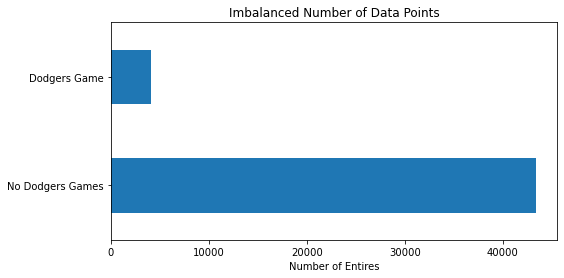

In [40]:
figure = plt.figure(figsize = (8,4))
Values["Value Count"].plot(kind="barh")
plt.title("Imbalanced Number of Data Points")
plt.xlabel("Number of Entires")
plt.savefig('Inbalanced_barchart.png', bbox_inches='tight')

### Creating a balanced dataset

Due to this drastic difference in the number of entries that do and do not occur around a Dodgers game, we decided to resampled the Traffic dataset to include a total of 4200 data points of Traffic for when their was no dodgers game happening, in order to balance out the Dataset. 

In [41]:
Game = df_traffic.query("Game == 1")
No_Game = df_traffic.query("Game == 0")
No_Game_resampled = resample(No_Game, n_samples = 4200)
balanced_traffic = pd.concat([Game, No_Game_resampled], axis = 0)
balanced_traffic.reset_index(drop = True, inplace=True)
balanced_traffic

balanced_traffic.to_csv("Balanced_New_Dodgers_Traffic.csv", index=False)

In [42]:
balanced_traffic

,Day_of_Week,Hour,Minute,Traffic,Game
0,1,12,40,40,1
1,1,12,45,13,1
2,1,12,50,34,1
3,1,12,55,30,1
4,1,13,0,34,1
...,...,...,...,...,...
8314,3,5,20,7,0
8315,4,1,20,1,0
8316,5,7,20,6,0
8317,6,8,50,18,0


### Dataset Descriprion of Balanced Dataset

**Basic Summary of Dataset**

In [43]:
balanced_traffic.shape

(8319, 5)

In [44]:
balanced_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Day_of_Week  8319 non-null   int64
 1   Hour         8319 non-null   int64
 2   Minute       8319 non-null   int64
 3   Traffic      8319 non-null   int64
 4   Game         8319 non-null   int64
dtypes: int64(5)
memory usage: 325.1 KB


**Interesting Statistics**

Comparing the distributions of the car counts of the balanced dataset, the car count or traffic distribution around the time Dodgers games ends sees a higher frequency of higher car counts compared to non Dodgers game ending intervals

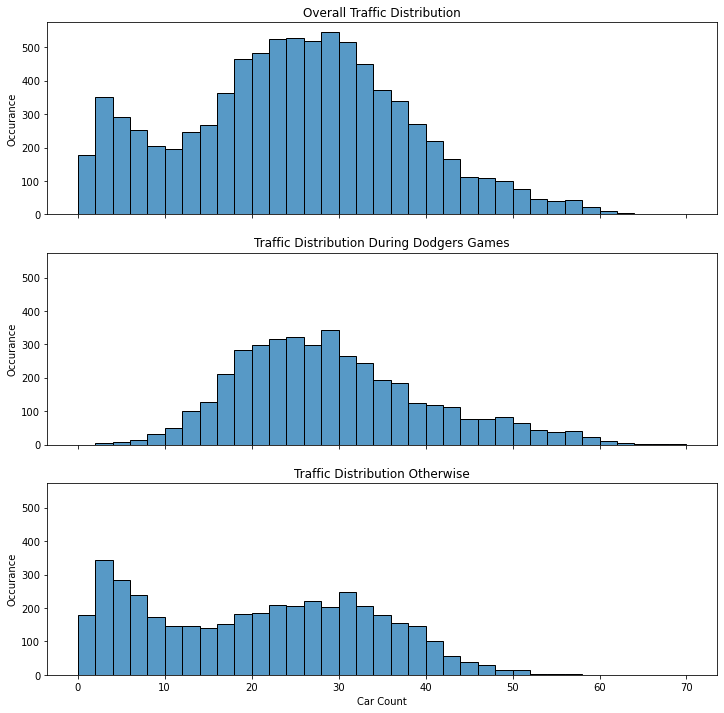

In [45]:
figure1, axes = plt.subplots(3,1, figsize=(12,12), sharex=True, sharey= True)
sns.histplot(data=balanced_traffic, x="Traffic", binwidth = 2, ax=axes[0]).set(title = "Overall Traffic Distribution", 
                                                                      xlabel = "Car Count",
                                                                      ylabel = "Occurance")

sns.histplot(data=balanced_traffic.query("Game == 1"), x="Traffic", binwidth = 2, ax=axes[1]).set(
    title = "Traffic Distribution During Dodgers Games", 
    xlabel = "Car Count",
    ylabel = "Occurance")

sns.histplot(data=balanced_traffic.query("Game == 0"), x="Traffic", binwidth = 2, ax=axes[2]).set(
    title = "Traffic Distribution Otherwise", 
    xlabel = "Car Count",
    ylabel = "Occurance")

plt.savefig('Traffic_Count_Distributions.png', bbox_inches='tight')

Wanting to see how Dodgers the ending games affects the total car by time, we created a bar chart containing the number of 5-minute intervals around the ending of a Dodgers and a heatmap heatmap for the total car count by minute (x-axis) and hour (y-axis). In doing so we see that the total car count increases around the time that a Dodgers game ends

In [46]:
#Heat map preperations
traffic_table = pd.DataFrame(balanced_traffic.Traffic.groupby([balanced_traffic.Hour,balanced_traffic.Minute]).sum())
traffic_table.rename_axis(["hour", "minute"], inplace=True)
traffic_table = traffic_table.reset_index()
traffic_table = traffic_table.pivot("hour", "minute", "Traffic")

In [47]:
Gametime_hours = balanced_traffic.query("Game == 1").Hour.groupby(balanced_traffic.query("Game == 1").Hour).count()

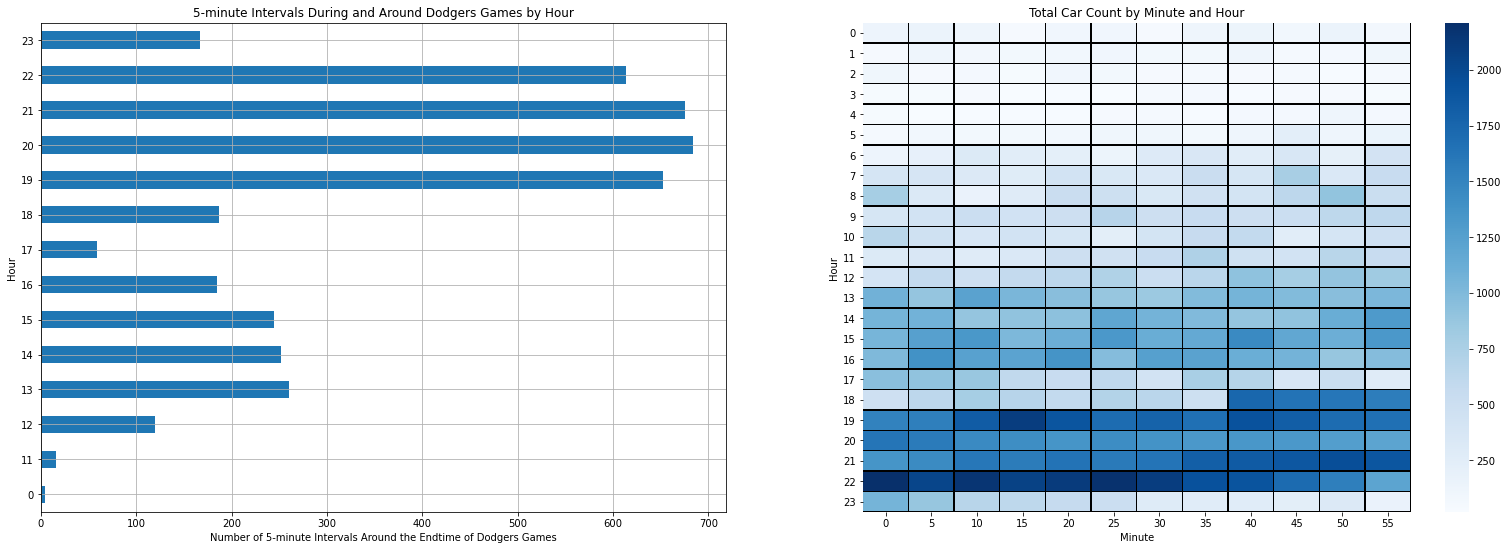

In [48]:
figure2 = plt.figure(figsize=(27,9))

ax1 = figure2.add_subplot(121)
Gametime_hours.plot(kind="barh", grid=True)
plt.title("5-minute Intervals During and Around Dodgers Games by Hour")
plt.ylabel("Hour")
plt.xlabel("Number of 5-minute Intervals Around the Endtime of Dodgers Games")

ax2 = figure2.add_subplot(122)
sns.heatmap(traffic_table, cmap='Blues', linewidths=.5, linecolor='black')
plt.title("Total Car Count by Minute and Hour")
plt.ylabel("Hour")
plt.xlabel("Minute")
plt.yticks(rotation=0)

plt.savefig('Game_Ending_Intervals_and_Total_Traffic_Count.png', bbox_inches='tight')

### Final Processesing Before Working on Models

**Note:** We wanted to include time in our models. We Initially did do one hot encoding, however we came to the conlcusion that since measurements of time are not categorical but interval we tried looking for some other ways.

*One Hot Encoding The Day of Week, Hour, and Minute Columns*    
We considered ways to encode or transform the date data in someway that made sense rather than just pulling out the the number day of the week, and hour and minute of day it was. One our first thoughs was using one hot. We used the One Hot Encoder documentation <a href="https://scikit-learn.org/0.24/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=one%20hot%20encoding?">page</a> on the Scikit Learn documentation website to help with the function.  We were having trouble with how the column headers were being stored, since initially didn't account for the columns being stored as MultiIndexes, where each column value was a tuple. The line encoded_column_df.columns.get_level_values() to help get the column headers the way that we wanted them formatted, which we used one of the documentation <a href="https://pandas.pydata.org/pandas-docs/version/1.2/user_guide/advanced.html?">pages</a> on the pandas documentation website for some help with the MultiIndex problem. See commented out cells, if you want to see what we had worked on from one of our previous notebooks.*


In [49]:
#encoder = OneHotEncoder(handle_unknown='ignore')

In [50]:
#column_data = np.array(balanced_traffic.Day_of_Week).reshape(-1, 1)
#column_data = encoder.fit_transform(column_data).toarray()
#encoded_column_df = pd.DataFrame(column_data, columns=encoder.categories_)
#print(encoded_column_df.columns)

In [51]:
#def one_hot_encoding_data(column_name):
    #column_data = np.array(column_name).reshape(-1, 1)
    #column_data = encoder.fit_transform(column_data).toarray()
    #encoded_column_df = pd.DataFrame(column_data, columns=encoder.categories_)
    #encoded_column_df.columns = encoded_column_df.columns.get_level_values(0)
    #return encoded_column_df

##*Passing the individual balanced_traffic columns through the one_hot_encoding_data and renaming the columns of the resulting dataframe to an appropriate column header*
#day_of_week_encoded = one_hot_encoding_data(balanced_traffic.Day_of_Week)
#day_of_week_encoded.rename(columns={0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}, inplace=True)

##Dropping the Day_of_Week column from the balanced traffic dataframe, so that we can concatenate the day_of_week_encoded dataframe with what remains in the balanced_traffic dataframe*
#balanced_traffic.drop(["Day_of_Week"], axis=1, inplace=True)
#encoded_balanced_traffic = pd.concat([day_of_week_encoded, balanced_traffic], axis=1)



We decided to follow Pierre-Louis Bescond way of going about encoding for cyclical features like time, by normalizing the data point to be within 0 and 2pi, then taking the cosine and sin of that result. Following the instructions from the towards datascience page, the codes below are what came out of it. This felt like a better move since it helps keep the cycled nature of time

Reference: Pierre-Louis Bescond (2020). Cyclical features encoding, it’s about time! Towards Data Science. Retrieved April 31, 2022, from <a href="https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca?">link</a>


In [52]:
day_transformation = pd.DataFrame(columns=["Day_of_Week_norm"])
day_transformation["Day_of_Week_norm"] = ((2 * np.pi * balanced_traffic["Day_of_Week"]) / (balanced_traffic["Day_of_Week"].max()))
day_transformation["Day_of_Week_cos"] = np.cos(day_transformation["Day_of_Week_norm"])
day_transformation["Day_of_Week_sin"] = np.sin(day_transformation["Day_of_Week_norm"])
day_transformation

,Day_of_Week_norm,Day_of_Week_cos,Day_of_Week_sin
0,1.047198,0.5,8.660254e-01
1,1.047198,0.5,8.660254e-01
2,1.047198,0.5,8.660254e-01
3,1.047198,0.5,8.660254e-01
4,1.047198,0.5,8.660254e-01
...,...,...,...
8314,3.141593,-1.0,1.224647e-16
8315,4.188790,-0.5,-8.660254e-01
8316,5.235988,0.5,-8.660254e-01
8317,6.283185,1.0,-2.449294e-16


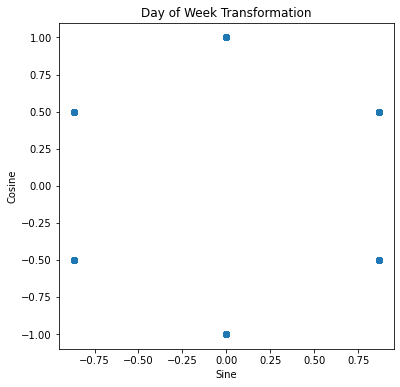

In [53]:
figure = plt.figure(figsize=(6,6))
plt.scatter(day_transformation.Day_of_Week_sin, day_transformation.Day_of_Week_cos)
plt.xlabel("Sine")
plt.ylabel("Cosine")
plt.title("Day of Week Transformation")
plt.savefig('day_transformation_graph.png', bbox_inches='tight')

In [54]:
hr_transformation = pd.DataFrame(columns=["Hour_norm"])
hr_transformation["Hour_norm"] = 2 * np.pi * balanced_traffic["Hour"] / balanced_traffic["Hour"].max()
hr_transformation["Hour_cos"] = np.cos(hr_transformation["Hour_norm"])
hr_transformation["Hour_sin"] = np.sin(hr_transformation["Hour_norm"])
hr_transformation

,Hour_norm,Hour_cos,Hour_sin
0,3.278184,-0.990686,-0.136167
1,3.278184,-0.990686,-0.136167
2,3.278184,-0.990686,-0.136167
3,3.278184,-0.990686,-0.136167
4,3.551366,-0.917211,-0.398401
...,...,...,...
8314,1.365910,0.203456,0.979084
8315,0.273182,0.962917,0.269797
8316,1.912274,-0.334880,0.942261
8317,2.185456,-0.576680,0.816970


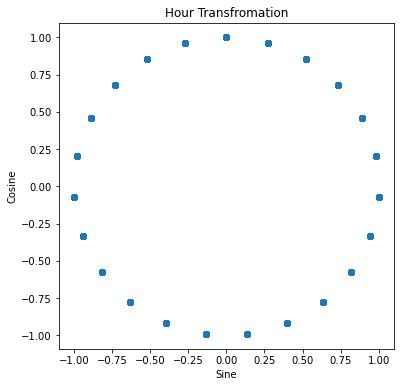

In [55]:
figure = plt.figure(figsize=(6,6))
plt.scatter(hr_transformation.Hour_sin, hr_transformation.Hour_cos)
plt.xlabel("Sine")
plt.ylabel("Cosine")
plt.title("Hour Transfromation")
plt.savefig('hr_transformation_graph.png', bbox_inches='tight')

In [56]:
min_transformation = pd.DataFrame(columns=["Minute_norm"])
min_transformation["Minute_norm"] = 2 * np.pi * balanced_traffic["Minute"] / balanced_traffic["Minute"].max()
min_transformation["Min_cos"] = np.cos(min_transformation["Minute_norm"])
min_transformation["Min_sin"] = np.sin(min_transformation["Minute_norm"])
min_transformation

,Minute_norm,Min_cos,Min_sin
0,4.569589,-0.142315,-9.898214e-01
1,5.140788,0.415415,-9.096320e-01
2,5.711987,0.841254,-5.406408e-01
3,6.283185,1.000000,-2.449294e-16
4,0.000000,1.000000,0.000000e+00
...,...,...,...
8314,2.284795,-0.654861,7.557496e-01
8315,2.284795,-0.654861,7.557496e-01
8316,2.284795,-0.654861,7.557496e-01
8317,5.711987,0.841254,-5.406408e-01


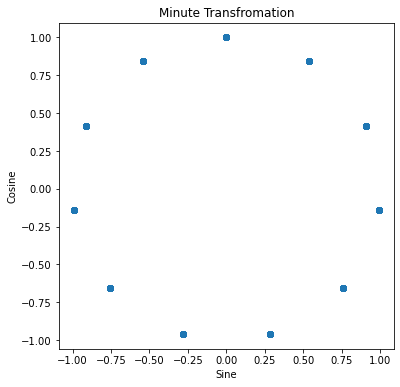

In [57]:
figure = plt.figure(figsize=(6,6))
plt.scatter(min_transformation.Min_sin, min_transformation.Min_cos)
plt.xlabel("Sine")
plt.ylabel("Cosine")
plt.title("Minute Transfromation")
plt.savefig('min_transformation_graph.png', bbox_inches='tight')

In [58]:
encoded_balanced_traffic = pd.DataFrame()
encoded_balanced_traffic = pd.concat([day_transformation, hr_transformation, min_transformation, balanced_traffic], axis=1)
encoded_balanced_traffic

,Day_of_Week_norm,Day_of_Week_cos,Day_of_Week_sin,Hour_norm,Hour_cos,Hour_sin,Minute_norm,Min_cos,Min_sin,Day_of_Week,Hour,Minute,Traffic,Game
0,1.047198,0.5,8.660254e-01,3.278184,-0.990686,-0.136167,4.569589,-0.142315,-9.898214e-01,1,12,40,40,1
1,1.047198,0.5,8.660254e-01,3.278184,-0.990686,-0.136167,5.140788,0.415415,-9.096320e-01,1,12,45,13,1
2,1.047198,0.5,8.660254e-01,3.278184,-0.990686,-0.136167,5.711987,0.841254,-5.406408e-01,1,12,50,34,1
3,1.047198,0.5,8.660254e-01,3.278184,-0.990686,-0.136167,6.283185,1.000000,-2.449294e-16,1,12,55,30,1
4,1.047198,0.5,8.660254e-01,3.551366,-0.917211,-0.398401,0.000000,1.000000,0.000000e+00,1,13,0,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8314,3.141593,-1.0,1.224647e-16,1.365910,0.203456,0.979084,2.284795,-0.654861,7.557496e-01,3,5,20,7,0
8315,4.188790,-0.5,-8.660254e-01,0.273182,0.962917,0.269797,2.284795,-0.654861,7.557496e-01,4,1,20,1,0
8316,5.235988,0.5,-8.660254e-01,1.912274,-0.334880,0.942261,2.284795,-0.654861,7.557496e-01,5,7,20,6,0
8317,6.283185,1.0,-2.449294e-16,2.185456,-0.576680,0.816970,5.711987,0.841254,-5.406408e-01,6,8,50,18,0


In [59]:
encoded_balanced_traffic = encoded_balanced_traffic[["Day_of_Week", "Day_of_Week_norm", "Day_of_Week_cos", "Day_of_Week_sin", "Hour", "Hour_norm", "Hour_cos", "Hour_sin", "Minute",
                                                     "Minute_norm", "Min_cos", "Min_sin", "Traffic", "Game"]]
encoded_balanced_traffic

,Day_of_Week,Day_of_Week_norm,Day_of_Week_cos,Day_of_Week_sin,Hour,Hour_norm,Hour_cos,Hour_sin,Minute,Minute_norm,Min_cos,Min_sin,Traffic,Game
0,1,1.047198,0.5,8.660254e-01,12,3.278184,-0.990686,-0.136167,40,4.569589,-0.142315,-9.898214e-01,40,1
1,1,1.047198,0.5,8.660254e-01,12,3.278184,-0.990686,-0.136167,45,5.140788,0.415415,-9.096320e-01,13,1
2,1,1.047198,0.5,8.660254e-01,12,3.278184,-0.990686,-0.136167,50,5.711987,0.841254,-5.406408e-01,34,1
3,1,1.047198,0.5,8.660254e-01,12,3.278184,-0.990686,-0.136167,55,6.283185,1.000000,-2.449294e-16,30,1
4,1,1.047198,0.5,8.660254e-01,13,3.551366,-0.917211,-0.398401,0,0.000000,1.000000,0.000000e+00,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8314,3,3.141593,-1.0,1.224647e-16,5,1.365910,0.203456,0.979084,20,2.284795,-0.654861,7.557496e-01,7,0
8315,4,4.188790,-0.5,-8.660254e-01,1,0.273182,0.962917,0.269797,20,2.284795,-0.654861,7.557496e-01,1,0
8316,5,5.235988,0.5,-8.660254e-01,7,1.912274,-0.334880,0.942261,20,2.284795,-0.654861,7.557496e-01,6,0
8317,6,6.283185,1.0,-2.449294e-16,8,2.185456,-0.576680,0.816970,50,5.711987,0.841254,-5.406408e-01,18,0


In [60]:
encoded_balanced_traffic.to_csv("encoded_balanced_traffic.csv", index = False)

### Models

*confusion matrix function*

In [61]:
def Confusion_matrix_graph(y_testing_data, y_prediction_data, filename):
    matrix = confusion_matrix(y_true = y_testing_data, y_pred = y_prediction_data)
    figure = plt.figure(figsize=(8,8))
    heatmap = sns.heatmap(matrix, annot=True, fmt = ".2f", cmap = "RdYlGn")
    plt.ylabel("Correct Value")
    plt.xlabel("Predicted Value")
    plt.title("Confusion Matrix")
    plt.savefig(filename)

## KNeighborsClassifier

*Experiment Parameter 1*

In [62]:
y = encoded_balanced_traffic.Game
X = np.array(encoded_balanced_traffic.iloc[:, :-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.80,
                                                    test_size=.20, 
                                                    random_state=25)

neighbor = KNeighborsClassifier(n_neighbors=3)
neighbor.fit(X_train,y_train)
y_pred = neighbor.predict(X_test)

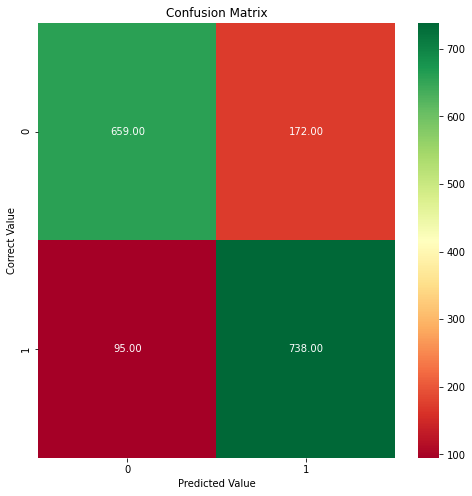

In [63]:
Confusion_matrix_graph(y_test, y_pred, "knn_matrix1.png")

In [64]:
neighbor.score(X_test,y_test)

0.8395432692307693

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       831
           1       0.81      0.89      0.85       833

    accuracy                           0.84      1664
   macro avg       0.84      0.84      0.84      1664
weighted avg       0.84      0.84      0.84      1664



*Experiment Parameter 2*

In [75]:
y = encoded_balanced_traffic.Game
X = np.array(encoded_balanced_traffic[['Day_of_Week', 'Hour', 'Minute', 'Traffic']])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.80,
                                                    test_size=.20, 
                                                    random_state=25)

neighbor = KNeighborsClassifier(n_neighbors=5)
neighbor.fit(X_train,y_train)
y_pred = neighbor.predict(X_test)

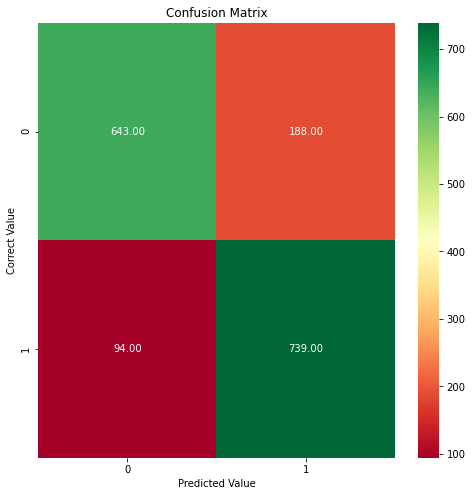

In [76]:
Confusion_matrix_graph(y_test, y_pred, "knn_matrix2.png")

In [77]:
neighbor.score(X_test,y_test)

0.8305288461538461

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       831
           1       0.80      0.89      0.84       833

    accuracy                           0.83      1664
   macro avg       0.83      0.83      0.83      1664
weighted avg       0.83      0.83      0.83      1664



*Experiment Parameter 3*

In [82]:
y = encoded_balanced_traffic.Game
X = np.array(encoded_balanced_traffic[['Day_of_Week_cos', 'Day_of_Week_sin', 'Hour_cos', 'Hour_sin', 'Minute', 'Min_cos', 'Min_sin']])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.70,
                                                    test_size=.30, 
                                                    random_state=25)

neighbor = KNeighborsClassifier(n_neighbors=3)
neighbor.fit(X_train,y_train)
y_pred = neighbor.predict(X_test)

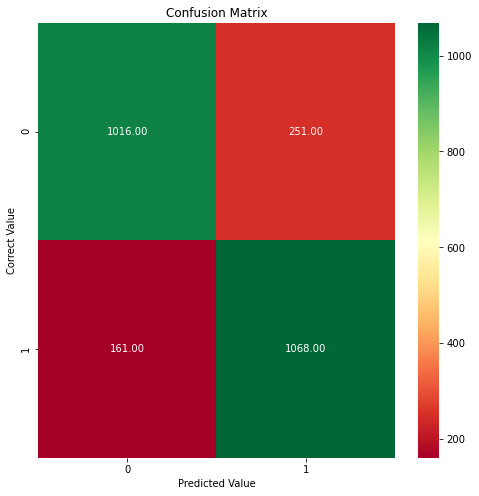

In [83]:
Confusion_matrix_graph(y_test, y_pred, "knn_matrix3.png")

In [84]:
neighbor.score(X_test,y_test)

0.8349358974358975

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1267
           1       0.81      0.87      0.84      1229

    accuracy                           0.83      2496
   macro avg       0.84      0.84      0.83      2496
weighted avg       0.84      0.83      0.83      2496



## Random Forest

*Experiment Parameter 1*

In [86]:
y = encoded_balanced_traffic.Game
X = np.array(encoded_balanced_traffic.iloc[:, :-1])

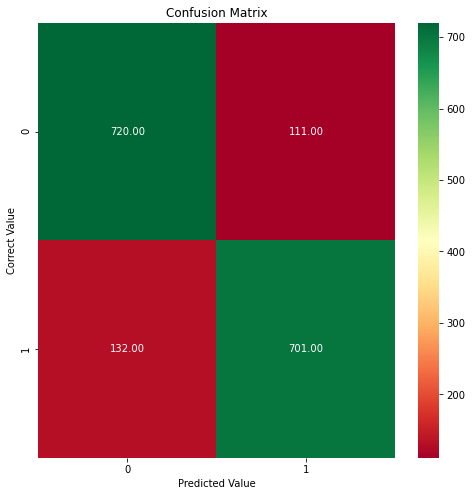

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.80,
                                                    test_size=.20, 
                                                    random_state=25)
model = RandomForestClassifier(n_estimators = 100,
                               criterion = "entropy",
                               bootstrap=False)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Confusion_matrix_graph(y_test, y_pred, "Random_Forest_confusion_matrix1.png")

In [88]:
print(f"{model.score(X_test, y_test)*100}%")

85.39663461538461%


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       831
           1       0.86      0.84      0.85       833

    accuracy                           0.85      1664
   macro avg       0.85      0.85      0.85      1664
weighted avg       0.85      0.85      0.85      1664



*Experiment Parameter 2*

In [90]:
y = encoded_balanced_traffic.Game
X = np.array(encoded_balanced_traffic[['Day_of_Week', 'Hour', 'Minute', 'Traffic']])

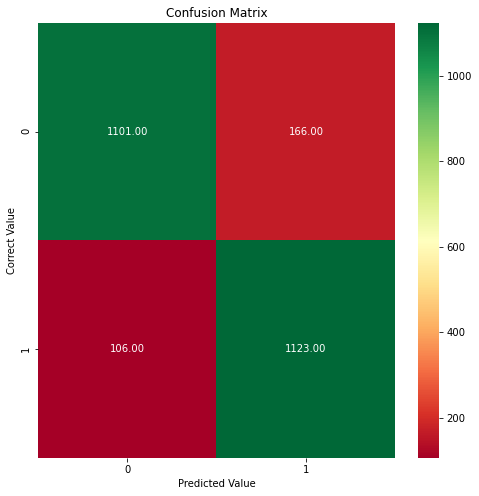

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.70,
                                                    test_size=.30, 
                                                    random_state=25)
model = RandomForestClassifier(n_estimators = 170,
                               criterion = "entropy", 
                               max_samples=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Confusion_matrix_graph(y_test, y_pred, "Random_Forest_confusion_matrix2.png")

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1267
           1       0.87      0.91      0.89      1229

    accuracy                           0.89      2496
   macro avg       0.89      0.89      0.89      2496
weighted avg       0.89      0.89      0.89      2496



In [93]:
print(f"{model.score(X_test, y_test)*100}%")

89.1025641025641%


*Experiment Parameter 3*

In [94]:
y = encoded_balanced_traffic.Game
X = np.array(encoded_balanced_traffic[["Day_of_Week_cos", "Day_of_Week_sin", "Hour_cos", "Hour_sin", "Min_cos", "Min_sin"]])

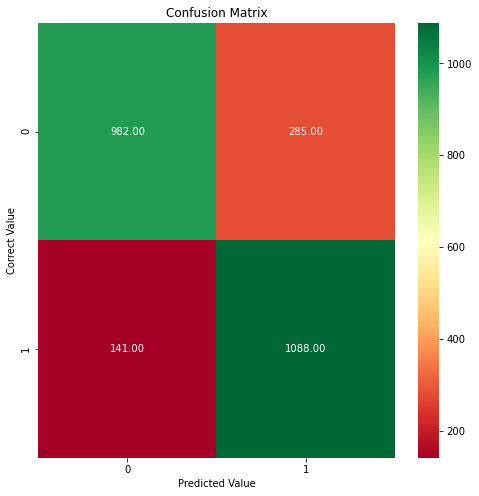

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.70,
                                                    test_size=.30, 
                                                    random_state=25)

model = RandomForestClassifier(n_estimators = 170,
                               criterion = "entropy",
                               max_samples=1500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Confusion_matrix_graph(y_test, y_pred, "Random_Forest_confusion_matrix3.png")

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1267
           1       0.79      0.89      0.84      1229

    accuracy                           0.83      2496
   macro avg       0.83      0.83      0.83      2496
weighted avg       0.83      0.83      0.83      2496



In [97]:
print(f"{model.score(X_test, y_test)*100}%")

82.9326923076923%
